# 0.) Import the Credit Card Fraud Data From CCLE

Hayden Johnson

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/MachineLearning/fraudTest.csv")

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df_select = df[['trans_date_trans_time','category','amt','city_pop','is_fraud']]

In [ ]:
df_select['lateNight'] = df_select.trans_date_trans_time.str[11:]
df_select['lateNight'] = df_select["lateNight"].str.replace(":","")
df_select['lateNight'] = df_select['lateNight'].astype(int)

<ipython-input-8-fba78ffc3f3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['lateNight'] = df_select.trans_date_trans_time.str[11:]
<ipython-input-8-fba78ffc3f3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['lateNight'] = df_select["lateNight"].str.replace(":","")
<ipython-input-8-fba78ffc3f3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
lateNightFraud = list()
for i in df_select['lateNight']:
  if i >= 230000 and i <= 233000:
    lateNightFraud.append(1)
  else:
    lateNightFraud.append(0)

In [ ]:
df_select['lateNightFraud'] = lateNightFraud

<ipython-input-11-4bf4e4543159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['lateNightFraud'] = lateNightFraud


In [ ]:
dummies = pd.get_dummies(df_select['category'])
X = pd.concat([dummies, df_select[['amt','city_pop','lateNightFraud']]], axis = 1)
y = df_select['is_fraud']

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
oversample = SMOTE()
smoteX, smoteY = oversample.fit_resample(X_train, y_train)

In [ ]:
ros = RandomOverSampler(random_state = 0)
overX, overY = ros.fit_resample(X_train, y_train)

In [ ]:
rus = RandomUnderSampler(random_state = 0)
underX, underY = rus.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression()
smoteReg = reg.fit(smoteX, smoteY)

In [ ]:
reg = LogisticRegression()
overReg = reg.fit(overX, overY)

In [ ]:
reg = LogisticRegression()
underReg = reg.fit(underX, underY)

# 4.) Test the three models

In [ ]:
smoteRegFit = smoteReg.predict(X_test)
smoteRegFit

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
overRegFit = overReg.predict(X_test)
overRegFit

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
underRegFit = underReg.predict(X_test)
underRegFit

array([1, 1, 1, ..., 1, 1, 0])

# 5.) Which performed best in Out of Sample metrics?

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
conf_matrix = confusion_matrix(y_test, smoteRegFit)

print(conf_matrix)

[[ 28676 137393]
 [    30    617]]


In [ ]:
conf_matrix = confusion_matrix(y_test, overRegFit)

print(conf_matrix)

[[ 28407 137662]
 [    29    618]]


In [ ]:
conf_matrix = confusion_matrix(y_test, underRegFit)

print(conf_matrix)

[[ 28726 137343]
 [    31    616]]


The true positive for smote and under is the same amount. Under has a slightly better false positive amount. False positive rate for smote is 99.55%. The false positive rate for over is 99.55%. False Positive rate for under is 99.55%. All three do not perform very well and would cause the credit card companies a lot of money.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [ ]:
df_select[df_select['is_fraud']==1][['amt', 'city_pop']]

,amt,city_pop
1685,24.84,23
1767,780.52,1306
1781,620.33,1306
1784,1077.69,71335
1857,842.65,23
...,...,...
517197,1041.51,14462
517274,868.09,14462
517341,1039.42,14462
517529,289.27,14462


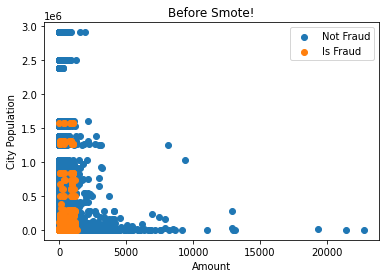

In [ ]:
OG_data_temp = pd.concat([X_train, y_train], axis =1)

plt.scatter(OG_data_temp[OG_data_temp['is_fraud']==0]['amt'], OG_data_temp[OG_data_temp['is_fraud']==0]['city_pop'])
plt.scatter(OG_data_temp[OG_data_temp['is_fraud']==1]['amt'], OG_data_temp[OG_data_temp['is_fraud']==1]['city_pop'])
plt.legend(['Not Fraud', 'Is Fraud'])
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.title('Before Smote!')
plt.show()

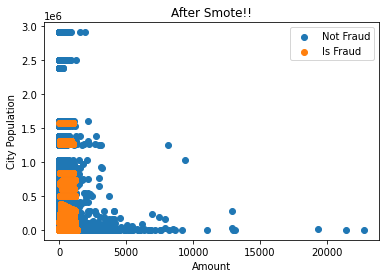

In [ ]:
smoteData = pd.concat([smoteX, smoteY], axis = 1)

plt.scatter(smoteData[smoteData['is_fraud']==0]['amt'], smoteData[smoteData['is_fraud']==0]['city_pop'])
plt.scatter(smoteData[smoteData['is_fraud']==1]['amt'], smoteData[smoteData['is_fraud']==1]['city_pop'])
plt.legend(['Not Fraud', 'Is Fraud'])
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.title('After Smote!!')
plt.show()